In [9]:
#df_ori.iloc[6943:].reset_index(drop=True).to_csv('/content/drive/MyDrive/Colab Notebooks/test_ori_dl.csv')
#df_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

Load data train

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_df6.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cek tipe data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6942 non-null   object 
 1   gender            6942 non-null   object 
 2   SeniorCitizen     6942 non-null   int64  
 3   Partner           6942 non-null   object 
 4   Dependents        6942 non-null   object 
 5   tenure            6942 non-null   int64  
 6   PhoneService      6942 non-null   object 
 7   MultipleLines     6942 non-null   object 
 8   InternetService   6942 non-null   object 
 9   OnlineSecurity    6942 non-null   object 
 10  OnlineBackup      6942 non-null   object 
 11  DeviceProtection  6942 non-null   object 
 12  TechSupport       6942 non-null   object 
 13  StreamingTV       6942 non-null   object 
 14  StreamingMovies   6942 non-null   object 
 15  Contract          6942 non-null   object 
 16  PaperlessBilling  6942 non-null   object 


In [80]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') #perbaiki TotalChares

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6942 non-null   object 
 1   gender            6942 non-null   object 
 2   SeniorCitizen     6942 non-null   int64  
 3   Partner           6942 non-null   object 
 4   Dependents        6942 non-null   object 
 5   tenure            6942 non-null   int64  
 6   PhoneService      6942 non-null   object 
 7   MultipleLines     6942 non-null   object 
 8   InternetService   6942 non-null   object 
 9   OnlineSecurity    6942 non-null   object 
 10  OnlineBackup      6942 non-null   object 
 11  DeviceProtection  6942 non-null   object 
 12  TechSupport       6942 non-null   object 
 13  StreamingTV       6942 non-null   object 
 14  StreamingMovies   6942 non-null   object 
 15  Contract          6942 non-null   object 
 16  PaperlessBilling  6942 non-null   object 


Cek Missing Value

In [82]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
df.dropna(subset=['TotalCharges'],inplace=True) #buang missing value

In [86]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Cek duplikasi data

In [87]:
df['customerID'].duplicated().sum()

0

In [90]:
# categorical_ohe = ['gender', 'Partner', 'Dependents', 'PhoneService',
#                    'PaperlessBilling','Churn']
# categorical_ohe = ['MultipleLines','InternetService', 'OnlineSecurity', 
#                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
#                    'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']
# numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

In [ ]:
#binary_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
#                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
#for col in binary_columns:
#    df_1[col].replace({'Yes': 1,'No': 0},inplace=True)

## Percobaan 1

In [148]:
df_churn1 = df.copy()
df_churn1.drop('customerID',axis=1,inplace=True)
df_churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
df_churn1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [150]:
for i in df_churn1.select_dtypes('object').columns:
  print(f'{i}: {df_churn1[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [151]:
# pie chart gender
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

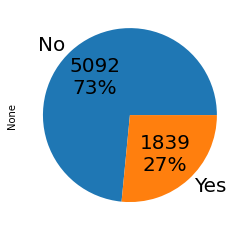

In [152]:
df_churn1.groupby('Churn').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20})

In [201]:
categorical_le = ['gender', 'Partner', 'Dependents', 'PhoneService',
                   'PaperlessBilling','Churn']
categorical_ohe = ['MultipleLines','InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

In [154]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()
for col in categorical_le:
  df_churn1[col] = le.fit_transform(df_churn1[col])

scaler = MinMaxScaler()
df_churn1[numerical_features] = scaler.fit_transform(df_churn1[numerical_features])

In [155]:
df_churn11 = pd.get_dummies(data=df_churn1, columns=categorical_ohe)

In [156]:
df_churn11.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [157]:
X = df_churn_smote.drop('Churn',axis=1)
y = df_churn_smote['Churn']

In [158]:
y

0       0
1       0
2       1
3       0
4       1
       ..
6937    0
6938    0
6939    0
6940    0
6941    0
Name: Churn, Length: 6931, dtype: int64

In [262]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)
X_smote = pd.DataFrame(X_smote, columns = X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2,random_state = 42)

In [264]:
input_shape = X_train.shape[1]
input_shape

40

In [265]:
#Importing necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation

In [266]:
model = Sequential()
model.add(Dense(32, input_dim=input_shape, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))


In [267]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [268]:
model.fit(x = X_train, y= y_train, validation_data=(X_test,y_test),
              epochs=25,
          batch_size=24)

Epoch 1/25
340/340 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.7410 - val_loss: 0.4801 - val_accuracy: 0.7801
Epoch 2/25
340/340 [==============================] - 1s 3ms/step - loss: 0.4897 - accuracy: 0.7654 - val_loss: 0.4774 - val_accuracy: 0.7752
Epoch 3/25
340/340 [==============================] - 1s 3ms/step - loss: 0.4802 - accuracy: 0.7716 - val_loss: 0.4739 - val_accuracy: 0.7757
Epoch 4/25
340/340 [==============================] - 1s 2ms/step - loss: 0.4789 - accuracy: 0.7694 - val_loss: 0.4740 - val_accuracy: 0.7796
Epoch 5/25
340/340 [==============================] - 1s 2ms/step - loss: 0.4748 - accuracy: 0.7757 - val_loss: 0.4698 - val_accuracy: 0.7771
Epoch 6/25
340/340 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.7742 - val_loss: 0.4704 - val_accuracy: 0.7761
Epoch 7/25
340/340 [==============================] - 1s 3ms/step - loss: 0.4695 - accuracy: 0.7732 - val_loss: 0.4678 - val_accuracy: 0.7820
Epoch 

In [252]:
test_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_ori_dl.csv')
test_ori.drop('Unnamed: 0',axis=1,inplace=True)

In [253]:
test_ori1 = test_ori.copy()

In [254]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()
for col in categorical_le:
  test_ori1[col] = le.fit_transform(test_ori1[col])
  
scaler = MinMaxScaler()
test_ori1[numerical_features] = scaler.fit_transform(test_ori1[numerical_features])
test_ori1 = pd.get_dummies(data=test_ori1, columns=categorical_ohe)

In [255]:
test_ori1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0032-PGELS,0,0,1,1,0.000000,0,0,0.122779,0.001329,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1,9039-ZVJDC,1,0,0,0,0.028169,1,1,0.000000,0.004326,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,6797-LNAQX,1,0,1,1,0.971831,1,0,0.852989,0.908982,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
3,9013-AQORL,0,0,0,1,0.661972,0,0,0.284868,0.277499,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
4,2898-MRKPI,1,0,1,1,0.943662,1,1,0.882606,0.897153,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [269]:
predict_churn = model.predict_classes(test_ori1.drop(['customerID','Churn'],axis=1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [140]:
predict_churn

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [258]:
churn = test_ori1['Churn']
churn

0     1
1     0
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    1
99    0
Name: Churn, Length: 100, dtype: int64

In [270]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(churn,predict_churn))
print(classification_report(churn,predict_churn))
print(accuracy_score(churn,predict_churn))

[[50 20]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.85      0.71      0.78        70
           1       0.51      0.70      0.59        30

    accuracy                           0.71       100
   macro avg       0.68      0.71      0.68       100
weighted avg       0.75      0.71      0.72       100

0.71


Beda model

In [168]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
ann = Sequential()
ann.add(Dense(units = 200,activation="relu", kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.2))
ann.add(Dense(units = 100, activation="relu",kernel_regularizer=l2(0.001)))
ann.add(Dropout(0.2))
ann.add(Dense(units = 50, activation="relu",kernel_regularizer=l2(0.001)))
ann.add(Dense(1,activation="sigmoid")) 
ann.compile(optimizer = "adam", loss="binary_crossentropy",metrics=["accuracy"])
callback=EarlyStopping(monitor="val_loss", patience=2)
history = ann.fit(x = X_train, y= y_train, validation_data=(X_test,y_test), batch_size=16, epochs=100,callbacks=[callback])

Epoch 1/100
347/347 [==============================] - 2s 3ms/step - loss: 0.6201 - accuracy: 0.7740 - val_loss: 0.5422 - val_accuracy: 0.8017
Epoch 2/100
347/347 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.7900 - val_loss: 0.5039 - val_accuracy: 0.8061
Epoch 3/100
347/347 [==============================] - 1s 2ms/step - loss: 0.4883 - accuracy: 0.7909 - val_loss: 0.4743 - val_accuracy: 0.8046
Epoch 4/100
347/347 [==============================] - 1s 2ms/step - loss: 0.4720 - accuracy: 0.7996 - val_loss: 0.4591 - val_accuracy: 0.8053
Epoch 5/100
347/347 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.8021 - val_loss: 0.4540 - val_accuracy: 0.8046
Epoch 6/100
347/347 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.7982 - val_loss: 0.4497 - val_accuracy: 0.8003
Epoch 7/100
347/347 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8027 - val_loss: 0.4480 - val_accuracy: 0.8075

Percobaan 2

In [239]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
smote_x_train, smote_y_train = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [240]:
smote_x_train = pd.DataFrame(smote_x_train, columns = X_train.columns)
smote_y_train = pd.DataFrame(smote_y_train, columns = ['Churn'])

In [176]:
model_smote = Sequential()
model_smote.add(Dense(32, input_dim=input_shape, kernel_initializer='uniform', activation='relu'))
model_smote.add(Dropout(0.5))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dropout(0.25))
model_smote.add(Dense(128, activation='relu'))
model_smote.add(Dropout(0.25))
model_smote.add(Dense(1, activation='sigmoid'))

In [177]:
model_smote.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [178]:
model_smote.fit(x = smote_x_train, y= smote_y_train, validation_data=(X_test,y_test),
              epochs=25,
          batch_size=24)

Epoch 1/25
339/339 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7418 - val_loss: 0.5100 - val_accuracy: 0.7404
Epoch 2/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4886 - accuracy: 0.7675 - val_loss: 0.5078 - val_accuracy: 0.7426
Epoch 3/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.7660 - val_loss: 0.4891 - val_accuracy: 0.7635
Epoch 4/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7706 - val_loss: 0.5014 - val_accuracy: 0.7498
Epoch 5/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.7740 - val_loss: 0.4901 - val_accuracy: 0.7549
Epoch 6/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4706 - accuracy: 0.7758 - val_loss: 0.4945 - val_accuracy: 0.7606
Epoch 7/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4686 - accuracy: 0.7795 - val_loss: 0.4916 - val_accuracy: 0.7498
Epoch 

In [182]:
smote_y_train.groupby('Churn').size()

Churn
0    4062
1    4062
dtype: int64

Percobaan 3

In [287]:
df_churn2 = df.copy()
df_churn2.drop('customerID',axis=1,inplace=True)
df_churn2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [288]:
df_churn2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [289]:
for i in df_churn2.select_dtypes('object').columns:
  print(f'{i}: {df_churn2[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [290]:
df_churn2.replace('No internet service','No',inplace=True)
df_churn2.replace('No phone service','No',inplace=True)

In [291]:
for i in df_churn2.select_dtypes('object').columns:
  print(f'{i}: {df_churn2[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [292]:
categorical_le2 = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies',
                   'PaperlessBilling','Churn']
categorical_ohe2 = ['InternetService',  'Contract','PaymentMethod']
numerical_features2 = ['tenure','MonthlyCharges', 'TotalCharges']

In [294]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le2 = LabelEncoder()
for col in categorical_le2:
  df_churn2[col] = le2.fit_transform(df_churn2[col])

scaler2 = MinMaxScaler()
df_churn2[numerical_features2] = scaler2.fit_transform(df_churn2[numerical_features2])

In [295]:
df_churn22 = pd.get_dummies(data=df_churn2, columns=categorical_ohe2)

In [296]:
df_churn22.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [297]:
X2 = df_churn22.drop('Churn',axis=1)
y2 = df_churn22['Churn']

In [298]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,random_state = 42)

In [299]:
input_shape2 = X_train2.shape[1]
input_shape2

26

In [300]:
model2 = Sequential()
model2.add(Dense(32, input_dim=input_shape2, kernel_initializer='uniform', activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))

In [301]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [302]:
model2.fit(x = X_train2, y= y_train2, validation_data=(X_test2,y_test2),
              epochs=25,
          batch_size=24)

Epoch 1/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.7419 - val_loss: 0.4387 - val_accuracy: 0.7974
Epoch 2/25
231/231 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7890 - val_loss: 0.4300 - val_accuracy: 0.7952
Epoch 3/25
231/231 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7854 - val_loss: 0.4243 - val_accuracy: 0.7945
Epoch 4/25
231/231 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7942 - val_loss: 0.4257 - val_accuracy: 0.8025
Epoch 5/25
231/231 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7983 - val_loss: 0.4273 - val_accuracy: 0.8061
Epoch 6/25
231/231 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8007 - val_loss: 0.4395 - val_accuracy: 0.8003
Epoch 7/25
231/231 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7992 - val_loss: 0.4203 - val_accuracy: 0.8046
Epoch 

In [303]:
test_ori2 = test_ori.copy()

In [304]:
test_ori2.replace('No internet service','No',inplace=True)
test_ori2.replace('No phone service','No',inplace=True)

In [305]:
test_ori2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0032-PGELS,Female,0,Yes,Yes,1,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.50,Yes
1,9039-ZVJDC,Male,0,No,No,3,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,19.10,53.05,No
2,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,Yes
3,9013-AQORL,Female,0,No,Yes,48,No,No,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No
4,2898-MRKPI,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),101.05,6770.50,No


In [306]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le2 = LabelEncoder()
for col in categorical_le2:
  test_ori2[col] = le2.fit_transform(test_ori2[col])
  
scaler2 = MinMaxScaler()
test_ori2[numerical_features2] = scaler2.fit_transform(test_ori2[numerical_features2])
test_ori2 = pd.get_dummies(data=test_ori2, columns=categorical_ohe2)

In [309]:
predict_churn2 = model2.predict_classes(test_ori2.drop(['customerID','Churn'],axis=1))

In [308]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(churn,predict_churn2))
print(classification_report(churn,predict_churn2))
print(accuracy_score(churn,predict_churn2))

[[65  5]
 [18 12]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        70
           1       0.71      0.40      0.51        30

    accuracy                           0.77       100
   macro avg       0.74      0.66      0.68       100
weighted avg       0.76      0.77      0.75       100

0.77


In [236]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
smote_x_train2, smote_y_train2 = sm.fit_resample(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [238]:
smote_x_train2 = pd.DataFrame(smote_x_train2, columns = X_train2.columns)
smote_y_train2 = pd.DataFrame(smote_y_train2, columns = ['Churn'])

In [243]:
model2.fit(x = smote_x_train2, y= smote_y_train2, validation_data=(X_test2,y_test2),
              epochs=25,
          batch_size=24)

Epoch 1/25
339/339 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7335 - val_loss: 0.5425 - val_accuracy: 0.7210
Epoch 2/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4879 - accuracy: 0.7677 - val_loss: 0.5019 - val_accuracy: 0.7541
Epoch 3/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4832 - accuracy: 0.7710 - val_loss: 0.5035 - val_accuracy: 0.7347
Epoch 4/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4784 - accuracy: 0.7755 - val_loss: 0.5005 - val_accuracy: 0.7642
Epoch 5/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.7760 - val_loss: 0.5441 - val_accuracy: 0.7397
Epoch 6/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4760 - accuracy: 0.7773 - val_loss: 0.5375 - val_accuracy: 0.7441
Epoch 7/25
339/339 [==============================] - 1s 2ms/step - loss: 0.4696 - accuracy: 0.7738 - val_loss: 0.5454 - val_accuracy: 0.7311
Epoch 